# **🍽️ Restaurant Tips Analysis**

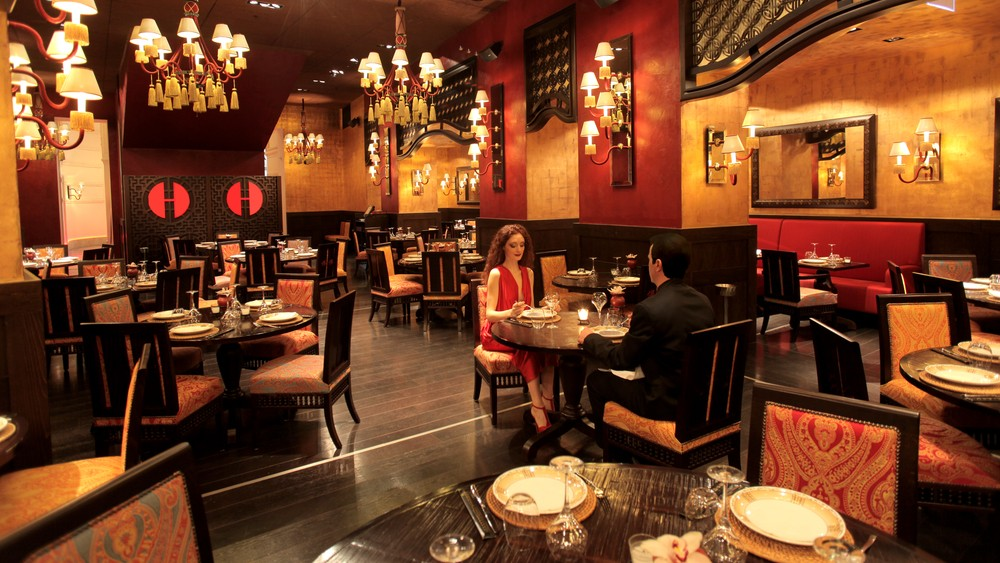

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
data = pd.read_csv("https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv")

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [3]:
# PUT YOUR CODE HERE
data.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [4]:
# PUT YOUR CODE HERE
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


,id,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


> **Ooops... 🤔**
>
> We have string columns considered as objects.

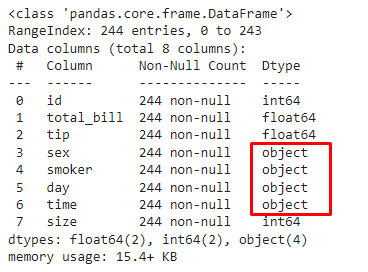

Let's fix their types and make them string:

In [5]:
# PUT YOUR CODE HERE
# Convert categorical columns to string type
data = data.astype(str)

Check again (output columns and their types):

In [6]:
# PUT YOUR CODE HERE
data.info()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          244 non-null    object
 1   total_bill  244 non-null    object
 2   tip         244 non-null    object
 3   sex         244 non-null    object
 4   smoker      244 non-null    object
 5   day         244 non-null    object
 6   time        244 non-null    object
 7   size        244 non-null    object
dtypes: object(8)
memory usage: 15.4+ KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [7]:
# PUT YOUR CODE HERE
data.describe()

,id,total_bill,tip,sex,smoker,day,time,size
count,244,244,244,244,244,244,244,244
unique,244,229,123,2,2,4,2,6
top,0,13.42,2.0,Male,No,Sat,Dinner,2
freq,1,3,33,157,151,87,176,156


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [8]:
# PUT YOUR CODE HERE
smokers_df = data.query('smoker =="Yes"')

Check whether everything is okay. Output a test sample (5 random rows):

In [9]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
170,170,50.81,10.0,Male,Yes,Sat,Dinner,3
187,187,30.46,2.0,Male,Yes,Sun,Dinner,5
183,183,23.17,6.5,Male,Yes,Sun,Dinner,4
217,217,11.59,1.5,Male,Yes,Sat,Dinner,2
105,105,15.36,1.64,Male,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [10]:
# PUT YOUR CODE HERE
non_smokers_df = data.query('smoker =="No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [11]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
51,51,10.29,2.6,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
114,114,25.71,4.0,Female,No,Sun,Dinner,3
232,232,11.61,3.39,Male,No,Sat,Dinner,2
124,124,12.48,2.52,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [12]:
# YOUR CODE
data['tip'] = pd.to_numeric(data['tip'], errors='coerce')
common_tip_min = data['tip'].min()
common_tip_max = data['tip'].max()
common_tip_mean = data['tip'].mean()
common_tip_median = data['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [13]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [14]:
# YOUR CODE
smokers_tip_min = pd.to_numeric(smokers_df['tip']).min()
smokers_tip_max = pd.to_numeric(smokers_df['tip']).max()
smokers_tip_mean = pd.to_numeric(smokers_df['tip']).mean()
smokers_tip_median = pd.to_numeric(smokers_df['tip']).median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [15]:
# YOUR CODE
print(smokers_tip_min)
print(smokers_tip_max)
print(smokers_tip_mean)
print(smokers_tip_median)

1.0
10.0
3.008709677419355
3.0


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [16]:
# YOUR CODE
non_smokers_tip_min = pd.to_numeric(non_smokers_df['tip']).min()
non_smokers_tip_max = pd.to_numeric(non_smokers_df['tip']).max()
non_smokers_tip_mean = pd.to_numeric(non_smokers_df['tip']).mean()
non_smokers_tip_median = pd.to_numeric(non_smokers_df['tip']).median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [17]:
# YOUR CODE
print(non_smokers_tip_min)
print(non_smokers_tip_max)
print(non_smokers_tip_mean)
print(non_smokers_tip_median)


1.0
9.0
2.9918543046357615
2.74


##### **📝 Conclusion** ✅ Smokers tend to leave higher tips than non-smokers.

Let's show the retrieved results together (we already have the code written for you 😉):

In [18]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:** 

---

1. Insight 1
2. Insight 1

**General conclusion:** 

✅ Smokers tend to leave higher tips than non-smokers and common.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

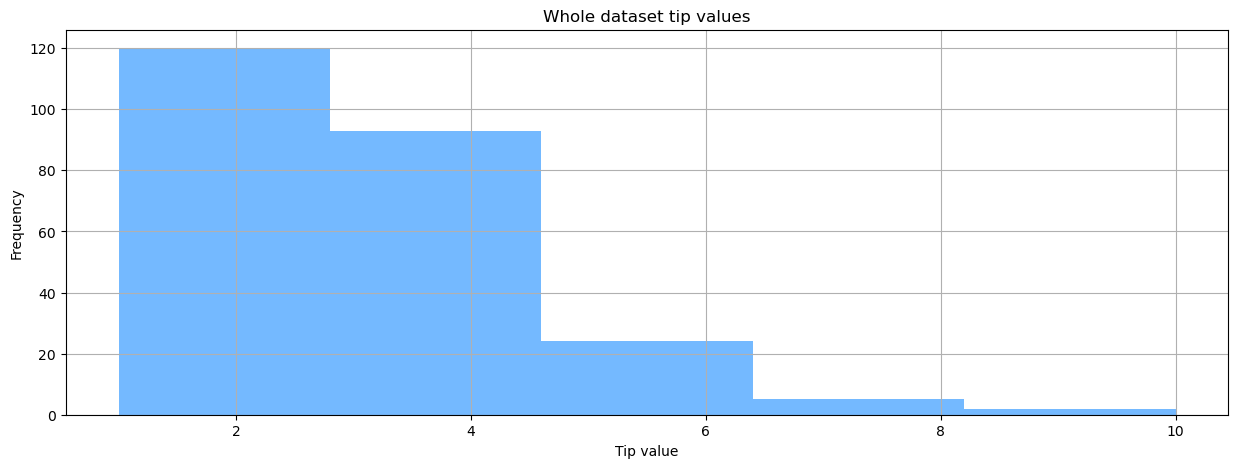

In [19]:
# YOUR CODE
# Plot the histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.hist(data.tip, bins = 5, color = '#74b9ff')

# Customize the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

# Show the plot
plt.show()

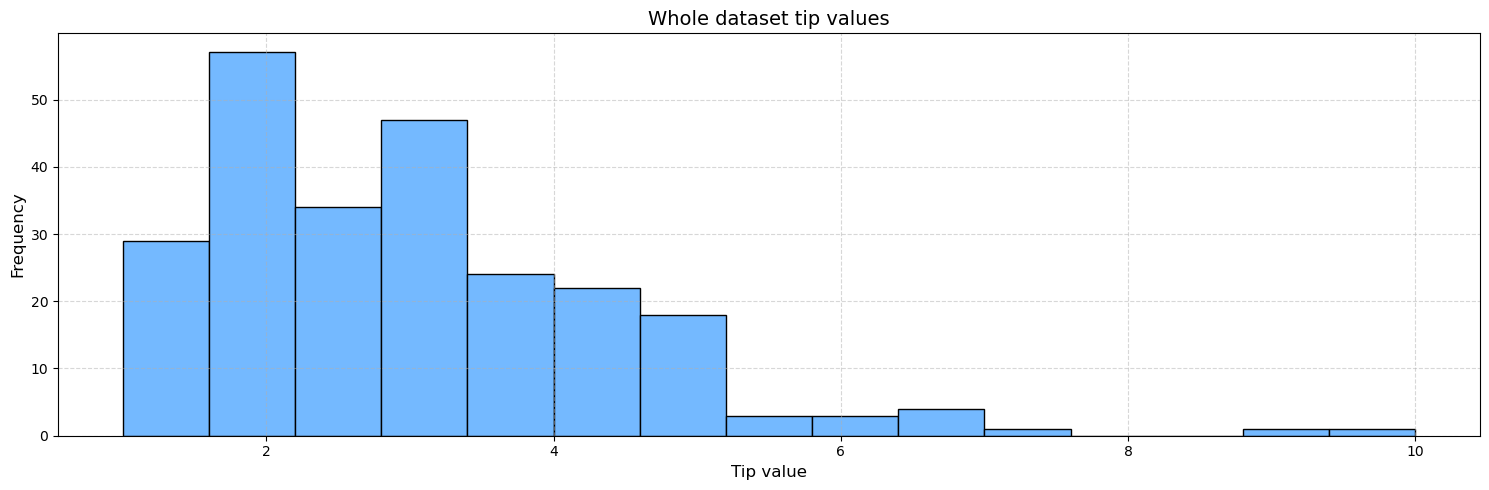

In [20]:
import matplotlib.pyplot as plt

# Lấy toàn bộ dữ liệu cột 'tip'
all_tips = data['tip']

# Vẽ biểu đồ histogram
plt.figure(figsize=(15, 5))
plt.hist(all_tips, bins=15, color='#74b9ff', edgecolor='black')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Whole dataset tip values', fontsize=14)

# Hiển thị lưới
plt.grid(True, linestyle='--', alpha=0.5)

# Căn chỉnh layout
plt.tight_layout()
plt.show()


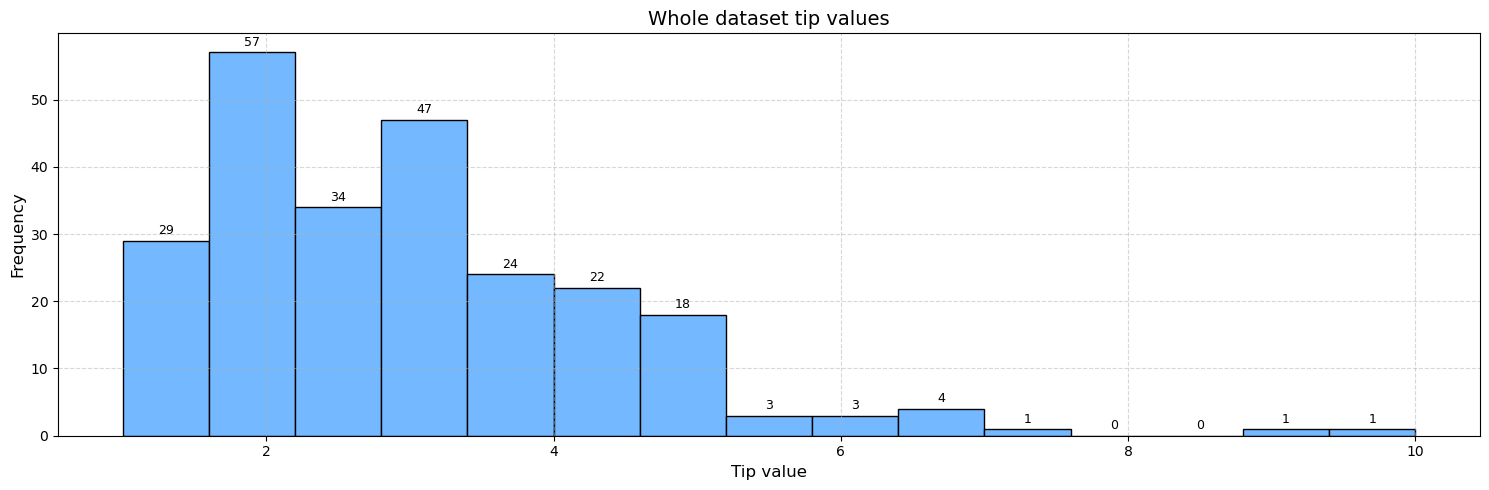

In [23]:
# Show label
import matplotlib.pyplot as plt

# Get all the data from the 'tip' column
all_tips = data['tip']

# Plot histogram
plt.figure(figsize=(15, 5))
counts, bins, patches = plt.hist(all_tips, bins=15, color='#74b9ff', edgecolor='black')

# Add label
for count, left, right in zip(counts, bins[:-1], bins[1:]):
    x = (left + right) / 2
    y = count
    plt.text(x, y + 0.5, f'{int(count)}', ha='center', va='bottom', fontsize=9)

# Labels and titles
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Whole dataset tip values', fontsize=14)

# Display grid
plt.grid(True, linestyle='--', alpha=0.5)

# Edit layout
plt.tight_layout()
plt.show()


##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

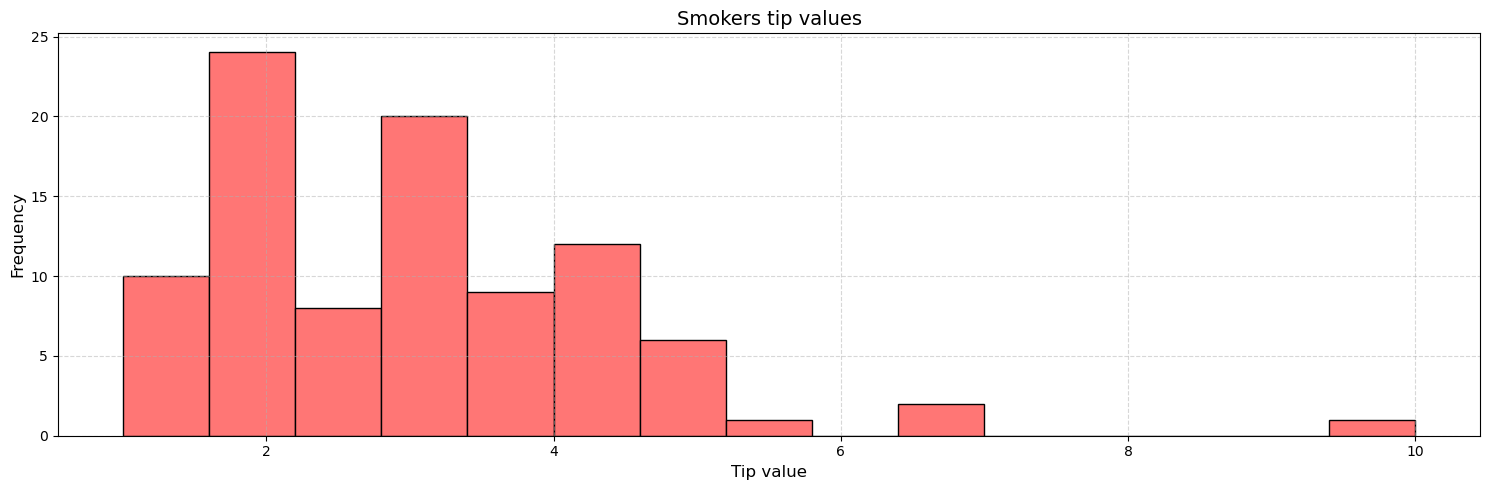

In [24]:
import matplotlib.pyplot as plt

# Filter 'smokers'
smoker_tips = data[data['smoker'] == 'Yes']['tip']

# Plot histogram
plt.figure(figsize=(15, 5))
plt.hist(smoker_tips, bins=15, color='#ff7675', edgecolor='black')

# Labels and titles
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Smokers tip values', fontsize=14)

# Display grid
plt.grid(True, linestyle='--', alpha=0.5)

# Edit layout
plt.tight_layout()
plt.show()


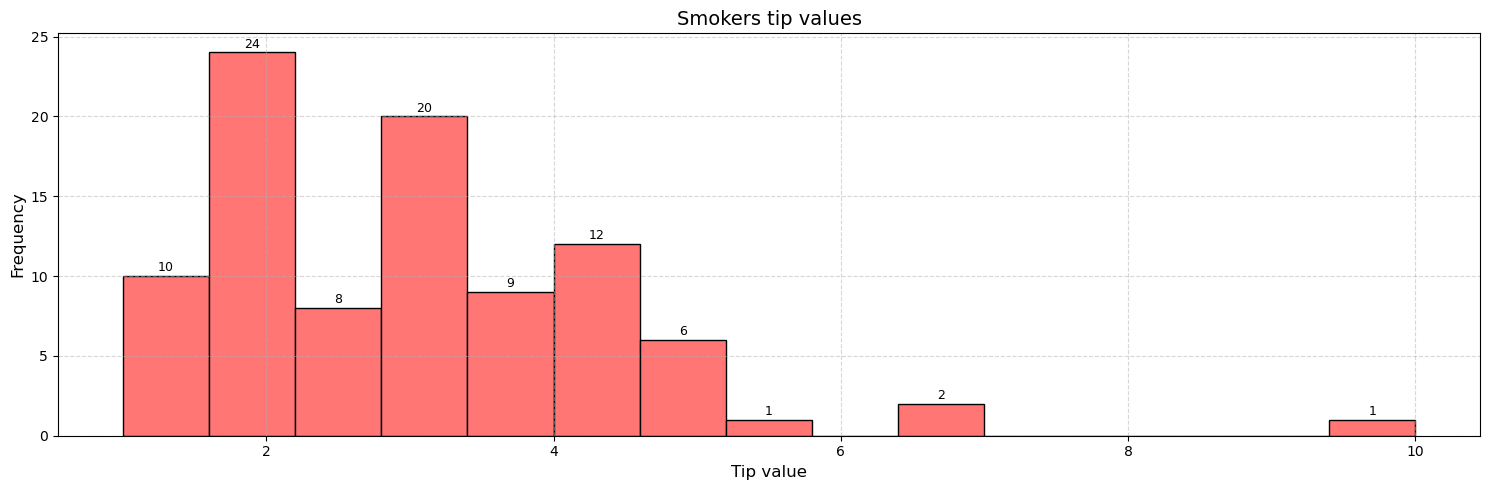

In [27]:
import matplotlib.pyplot as plt

# Filter 'smokers'
smokers_tips = data[data['smoker'] == 'Yes']['tip']

# Plot histogram
plt.figure(figsize=(15, 5))
counts, bins, patches = plt.hist(smokers_tips, bins=15, color='#ff7675', edgecolor='black')

# Labels
for count, left, right in zip(counts, bins[:-1], bins[1:]):
    x = (left + right) / 2
    y = count
    if count > 0:
        plt.text(x, y + 0.3, f'{int(count)}', ha='center', fontsize=9)

# Edit labels and titles
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Smokers tip values', fontsize=14)

# Edit layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

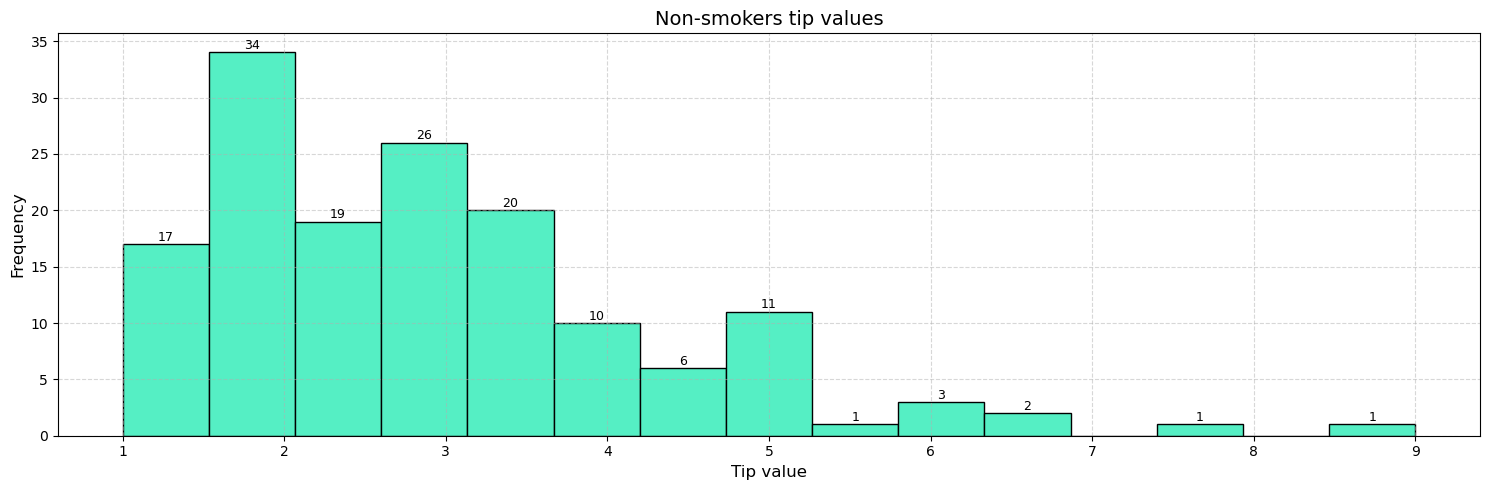

In [28]:
import matplotlib.pyplot as plt

# Filter 'non-smokers'
nonsmokers_tips = data[data['smoker'] == 'No']['tip']

# Plot histogram
plt.figure(figsize=(15, 5))
counts, bins, patches = plt.hist(nonsmokers_tips, bins=15, color='#55efc4', edgecolor='black')

# Labels on columns
for count, left, right in zip(counts, bins[:-1], bins[1:]):
    x = (left + right) / 2
    y = count
    if count > 0:
        plt.text(x, y + 0.3, f'{int(count)}', ha='center', fontsize=9)

# Edit labels and titles
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Non-smokers tip values', fontsize=14)

# Edit layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

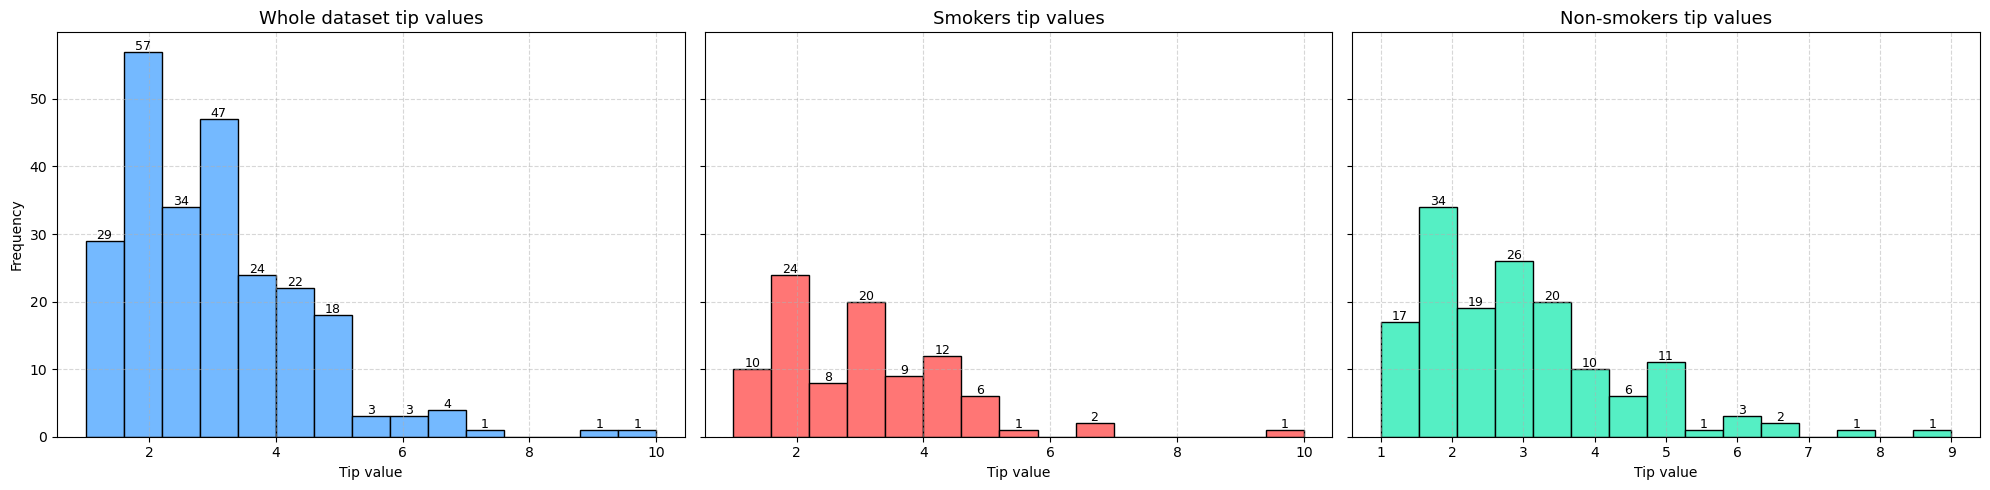

In [29]:
# YOUR CODE

import matplotlib.pyplot as plt

# Data
all_tips = data['tip']
smokers_tips = data[data['smoker'] == 'Yes']['tip']
nonsmokers_tips = data[data['smoker'] == 'No']['tip']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

# --- 1. Whole dataset ---
counts_all, bins_all, patches_all = axes[0].hist(all_tips, bins=15, color='#74b9ff', edgecolor='black')
axes[0].set_title('Whole dataset tip values', fontsize=13)
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.5)
for count, left, right in zip(counts_all, bins_all[:-1], bins_all[1:]):
    if count > 0:
        axes[0].text((left + right) / 2, count + 0.3, f'{int(count)}', ha='center', fontsize=9)

# --- 2. Smokers ---
counts_smokers, bins_smokers, patches_smokers = axes[1].hist(smokers_tips, bins=15, color='#ff7675', edgecolor='black')
axes[1].set_title('Smokers tip values', fontsize=13)
axes[1].set_xlabel('Tip value')
axes[1].grid(True, linestyle='--', alpha=0.5)
for count, left, right in zip(counts_smokers, bins_smokers[:-1], bins_smokers[1:]):
    if count > 0:
        axes[1].text((left + right) / 2, count + 0.3, f'{int(count)}', ha='center', fontsize=9)

# --- 3. Non-smokers ---
counts_nonsmokers, bins_nonsmokers, patches_nonsmokers = axes[2].hist(nonsmokers_tips, bins=15, color='#55efc4', edgecolor='black')
axes[2].set_title('Non-smokers tip values', fontsize=13)
axes[2].set_xlabel('Tip value')
axes[2].grid(True, linestyle='--', alpha=0.5)
for count, left, right in zip(counts_nonsmokers, bins_nonsmokers[:-1], bins_nonsmokers[1:]):
    if count > 0:
        axes[2].text((left + right) / 2, count + 0.3, f'{int(count)}', ha='center', fontsize=9)

# Final layout
plt.tight_layout()
plt.show()



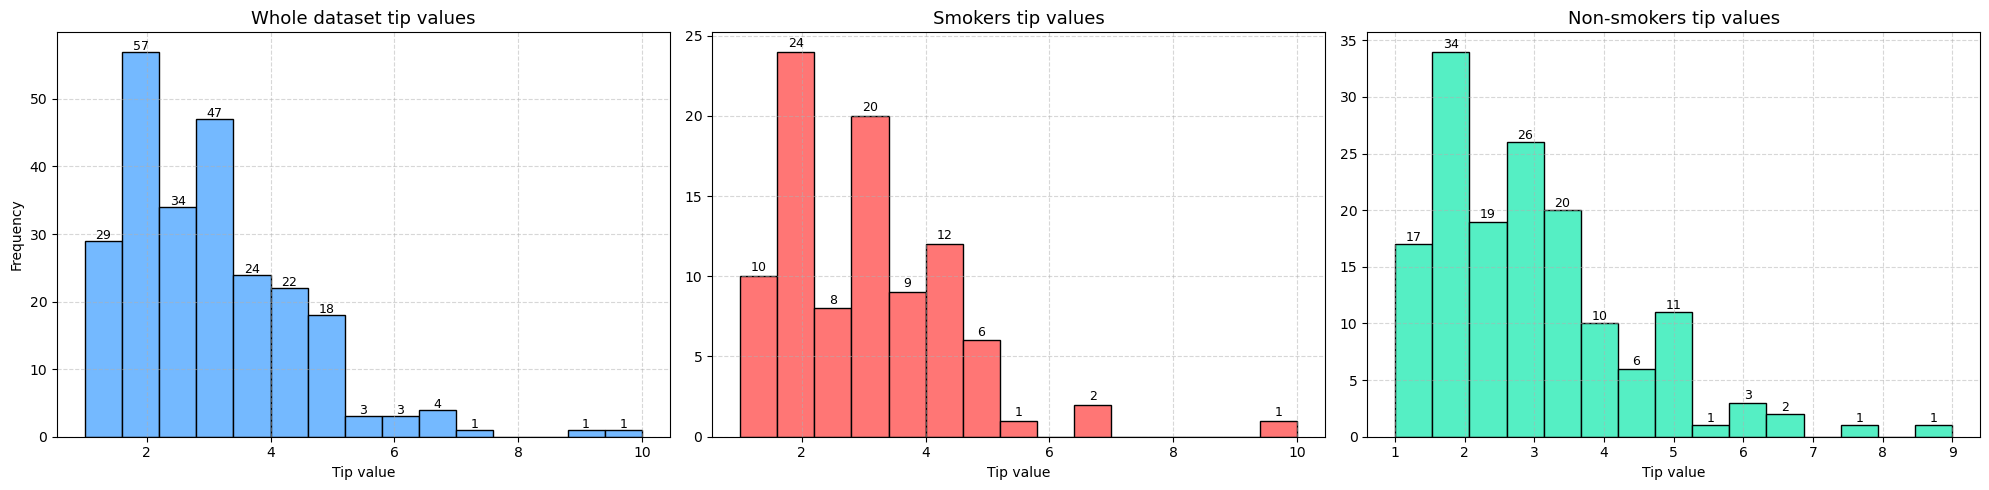

In [31]:
import matplotlib.pyplot as plt

# Filter 
all_tips = data['tip']
smoker_tips = data[data['smoker'] == 'Yes']['tip']
non_smoker_tips = data[data['smoker'] == 'No']['tip']

# Create size of chart
plt.figure(figsize=(20, 5))

# --- Subplot 1: Whole dataset ---
plt.subplot(1, 3, 1)
counts1, bins1, _ = plt.hist(all_tips, bins=15, color='#74b9ff', edgecolor='black')
plt.title('Whole dataset tip values', fontsize=13)
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
for x, y in zip(bins1[:-1], counts1):
    if y > 0:
        plt.text(x + (bins1[1]-bins1[0])/2, y + 0.3, int(y), ha='center', fontsize=9)

# --- Subplot 2: Smokers ---
plt.subplot(1, 3, 2)
counts2, bins2, _ = plt.hist(smoker_tips, bins=15, color='#ff7675', edgecolor='black')
plt.title('Smokers tip values', fontsize=13)
plt.xlabel('Tip value')
plt.grid(True, linestyle='--', alpha=0.5)
for x, y in zip(bins2[:-1], counts2):
    if y > 0:
        plt.text(x + (bins2[1]-bins2[0])/2, y + 0.3, int(y), ha='center', fontsize=9)

# --- Subplot 3: Non-smokers ---
plt.subplot(1, 3, 3)
counts3, bins3, _ = plt.hist(non_smoker_tips, bins=15, color='#55efc4', edgecolor='black')
plt.title('Non-smokers tip values', fontsize=13)
plt.xlabel('Tip value')
plt.grid(True, linestyle='--', alpha=0.5)
for x, y in zip(bins3[:-1], counts3):
    if y > 0:
        plt.text(x + (bins3[1]-bins3[0])/2, y + 0.3, int(y), ha='center', fontsize=9)

# Show chart
plt.tight_layout()
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

**General conclusion:**

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [46]:
# ✅ 1. Average Tip by Gender (Mean & Median)
# Mean tip by gender
mean_tip_by_gender = data.groupby('sex')['tip'].mean()

# Median tip by gender
median_tip_by_gender = data.groupby('sex')['tip'].median()

print("Mean tip by gender:\n", mean_tip_by_gender)
print("\nMedian tip by gender:\n", median_tip_by_gender)


Mean tip by gender:
 sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

Median tip by gender:
 sex
Female    2.75
Male      3.00
Name: tip, dtype: float64


In [47]:
# ✅ 2. Total Tip Amount by Gender
# Total tip amount by gender
total_tip_by_gender = data.groupby('sex')['tip'].sum()
print("Total tip amount by gender:\n", total_tip_by_gender)


Total tip amount by gender:
 sex
Female    246.51
Male      485.07
Name: tip, dtype: float64


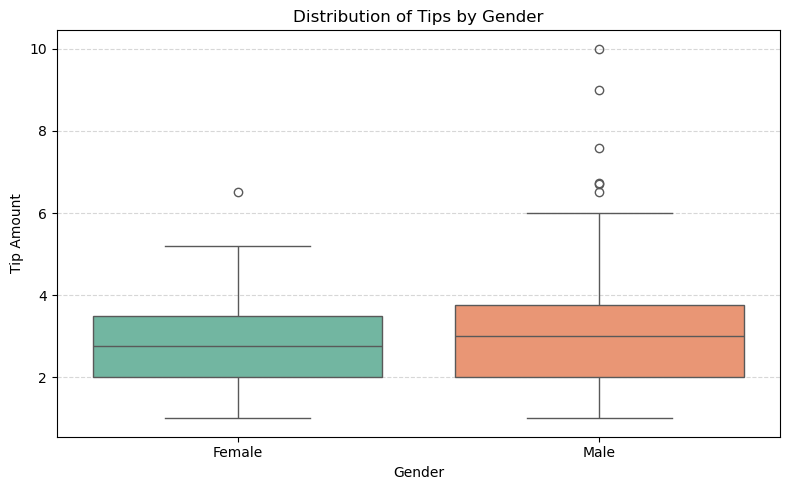

In [49]:
# ✅ 3. Visual Comparison (Boxplot + Mean Line)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='sex', y='tip', hue='sex', palette='Set2', legend=False)
plt.title('Distribution of Tips by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip Amount')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


✅ Overall conclusion:<br>
Men tend to leave higher tips than women, both in terms of median and maximum values. However, their tipping behavior also shows greater variability.

✅ Another way: remove outliers for more accurate calculation.

In [32]:
# Step 1: Calculate IQR for the 'tip' column
Q1 = data['tip'].quantile(0.25)
Q3 = data['tip'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine the outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out values outside the threshold
data_no_outliers = data[(data['tip'] >= lower_bound) & (data['tip'] <= upper_bound)]


In [34]:
# Step 2: Group by gender and calculate mean, median
tip_stats = data_no_outliers.groupby('sex')['tip'].agg(['mean', 'median']).round(2)
print(tip_stats)


        mean  median
sex                 
Female  2.79    2.68
Male    2.86    2.74


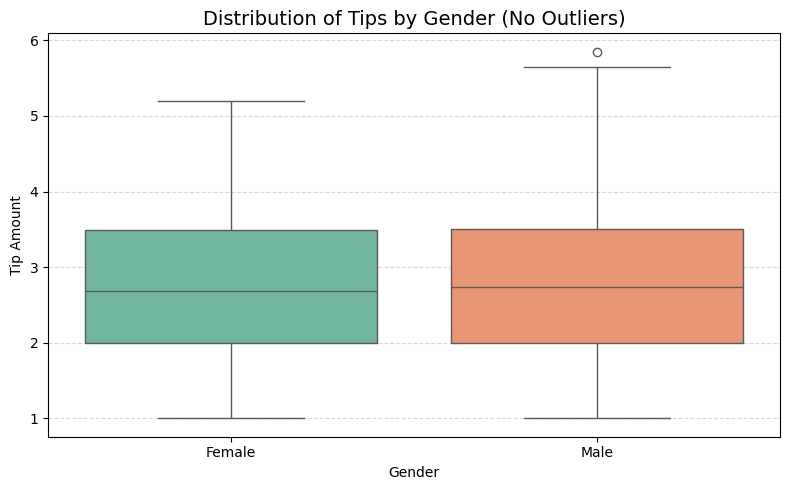

In [35]:
# Step 3: draw the chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=data_no_outliers, x='sex', y='tip', hue='sex', palette='Set2', legend=False)

plt.title('Distribution of Tips by Gender (No Outliers)', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Tip Amount')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



✅ Conclusion:

After removing outliers, the difference in tipping between males and females becomes smaller. Although males show greater variability and have some higher tips, the median values of both groups are nearly equal, indicating no significant difference in generosity between the two genders.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [36]:
# Create a weekend list
weekend_days = ['Sat', 'Sun']

# Split the data into 2 DataFrames: weekend and weekday
weekend_df = data[data['day'].isin(weekend_days)].copy()
weekday_df = data[~data['day'].isin(weekend_days)].copy()

# Print result
print("Số dòng weekend:", len(weekend_df))
print("Số dòng weekday:", len(weekday_df))


Số dòng weekend: 163
Số dòng weekday: 81


In [41]:
# ✅ 1. Prepare the Data
# Create a copy of the data to work with
data_day = data.copy()

# Define weekend days based on actual values in 'day' column
weekend_days = ['Sat', 'Sun']

# Add new column for classification
data_day['day_type'] = data_day['day'].apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')

# Kiểm tra kết quả
print(data_day[['day', 'day_type']].drop_duplicates())



     day day_type
0    Sun  Weekend
19   Sat  Weekend
77  Thur  Weekday
90   Fri  Weekday


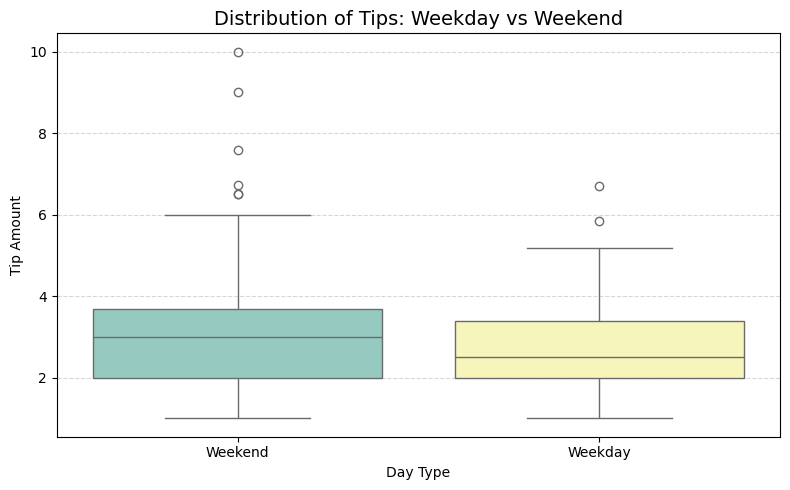

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Boxplot chart comparing tips by day type
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_day, x='day_type', y='tip', hue='day_type', palette='Set3', legend=False)

# Set title and label
plt.title('Distribution of Tips: Weekday vs Weekend', fontsize=14)
plt.xlabel('Day Type')
plt.ylabel('Tip Amount')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show chart
plt.tight_layout()
plt.show()



In [44]:
# Calculate the average and median of tips by day type
mean_tips = data_day.groupby('day_type')['tip'].mean().round(2)
median_tips = data_day.groupby('day_type')['tip'].median().round(2)

# Print result
print("📊 Mean tip by day type:")
print(mean_tips)

print("\n📊 Median tip by day type:")
print(median_tips)



📊 Mean tip by day type:
day_type
Weekday    2.76
Weekend    3.12
Name: tip, dtype: float64

📊 Median tip by day type:
day_type
Weekday    2.5
Weekend    3.0
Name: tip, dtype: float64


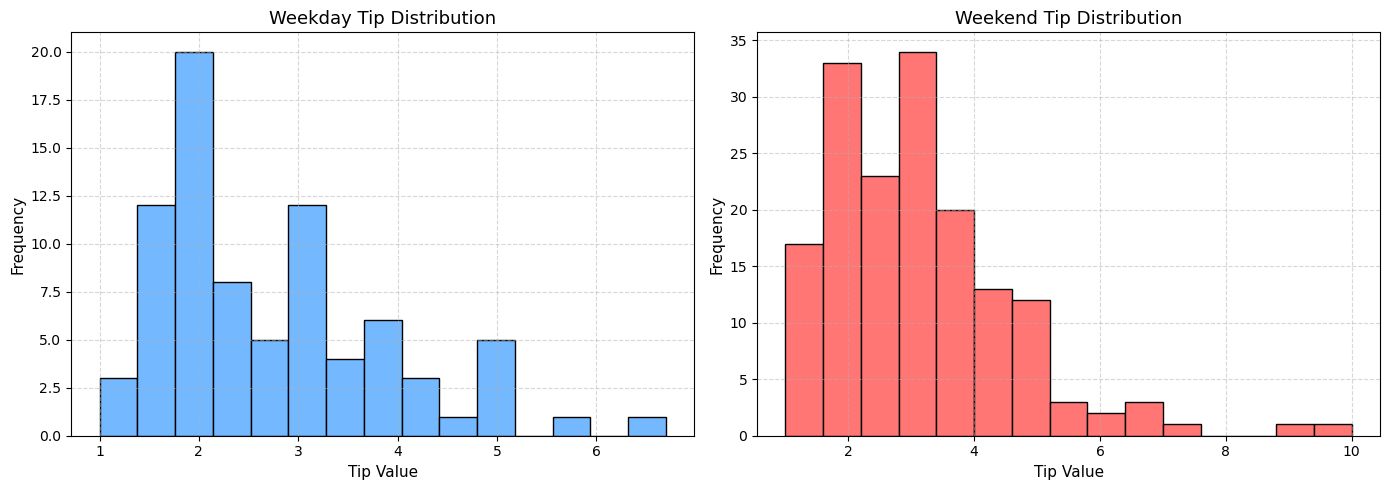

In [45]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(14, 5))

# Histogram for Weekday
plt.subplot(1, 2, 1)
weekday_tips = data_day[data_day['day_type'] == 'Weekday']['tip']
plt.hist(weekday_tips, bins=15, color='#74b9ff', edgecolor='black')
plt.title('Weekday Tip Distribution', fontsize=13)
plt.xlabel('Tip Value', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# Histogram for Weekend
plt.subplot(1, 2, 2)
weekend_tips = data_day[data_day['day_type'] == 'Weekend']['tip']
plt.hist(weekend_tips, bins=15, color='#ff7675', edgecolor='black')
plt.title('Weekend Tip Distribution', fontsize=13)
plt.xlabel('Tip Value', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# Layout
plt.tight_layout()
plt.show()



✅ Comparison chart:

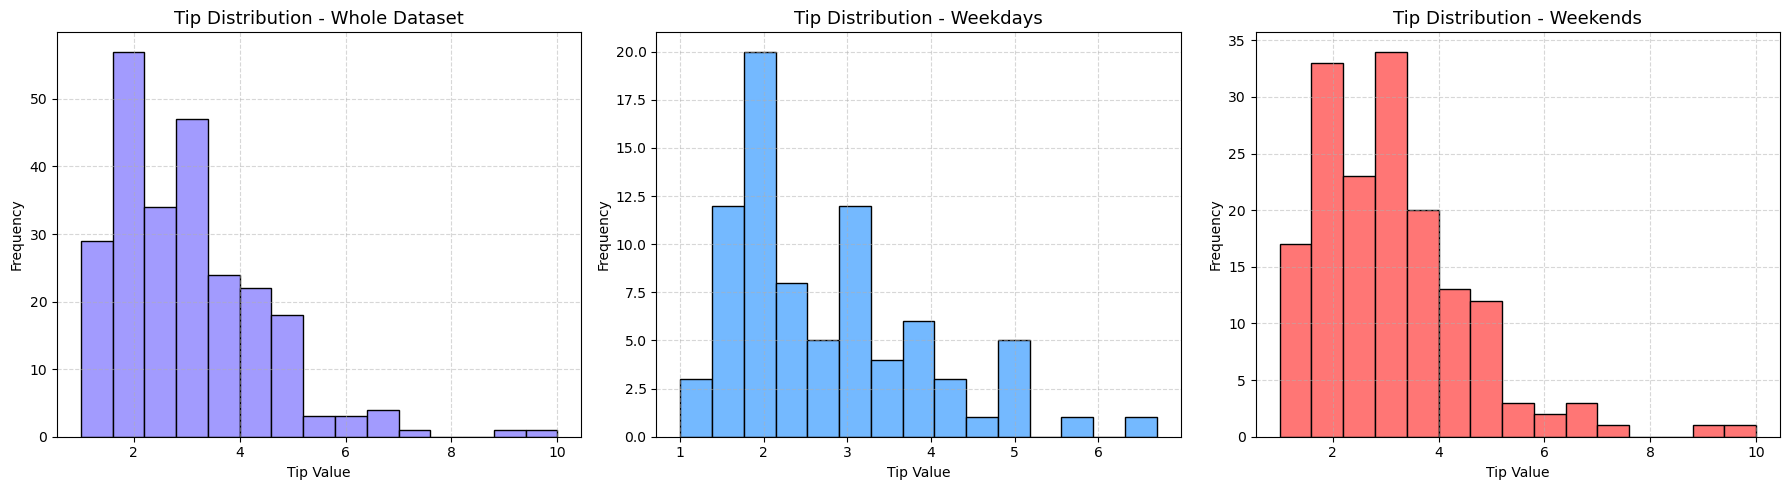

In [46]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(18, 5))

# --- Subplot 1: Whole dataset ---
plt.subplot(1, 3, 1)
plt.hist(data['tip'], bins=15, color='#a29bfe', edgecolor='black')
plt.title('Tip Distribution - Whole Dataset', fontsize=13)
plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Weekday ---
plt.subplot(1, 3, 2)
plt.hist(data_day[data_day['day_type'] == 'Weekday']['tip'], bins=15, color='#74b9ff', edgecolor='black')
plt.title('Tip Distribution - Weekdays', fontsize=13)
plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 3: Weekend ---
plt.subplot(1, 3, 3)
plt.hist(data_day[data_day['day_type'] == 'Weekend']['tip'], bins=15, color='#ff7675', edgecolor='black')
plt.title('Tip Distribution - Weekends', fontsize=13)
plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

# Show chart
plt.tight_layout()
plt.show()


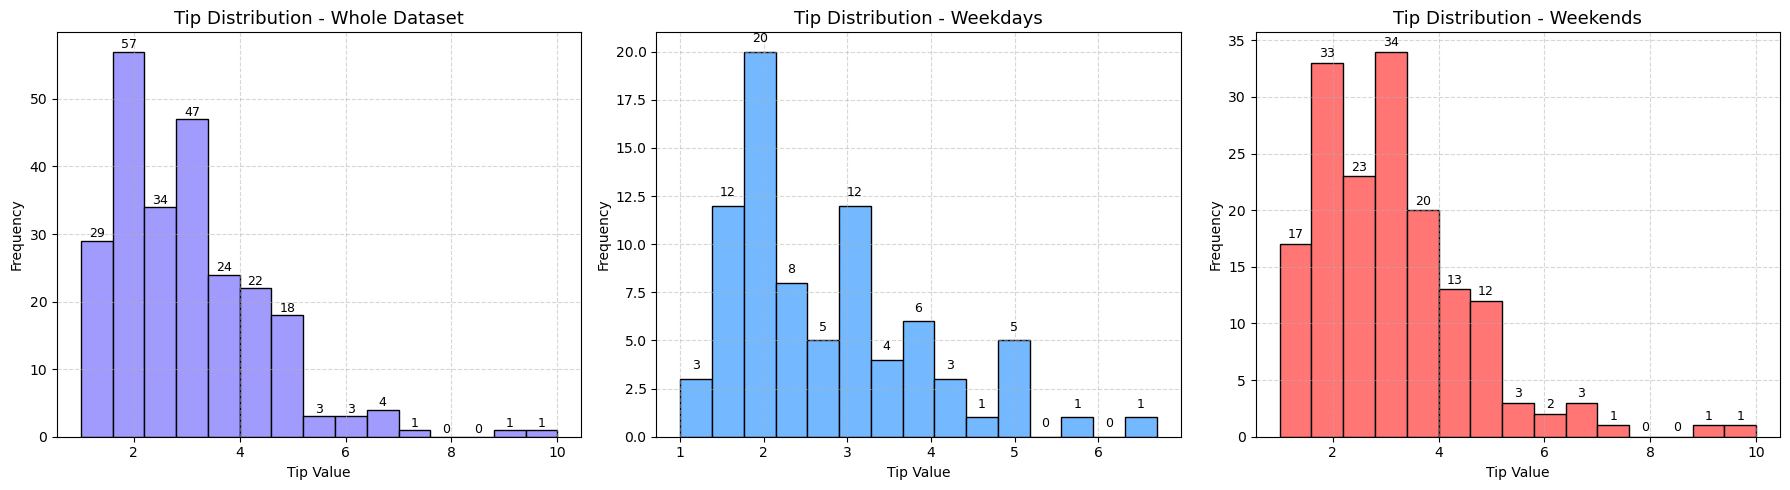

In [47]:
import matplotlib.pyplot as plt

# Create chart
plt.figure(figsize=(18, 5))

# --- Subplot 1: Whole dataset ---
plt.subplot(1, 3, 1)
n, bins, _ = plt.hist(data['tip'], bins=15, color='#a29bfe', edgecolor='black')
plt.title('Tip Distribution - Whole Dataset', fontsize=13)
plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

# Label on column
for i in range(len(n)):
    plt.text((bins[i] + bins[i+1]) / 2, n[i] + 0.5, int(n[i]), ha='center', fontsize=9)

# --- Subplot 2: Weekday ---
plt.subplot(1, 3, 2)
n, bins, _ = plt.hist(data_day[data_day['day_type'] == 'Weekday']['tip'], bins=15, color='#74b9ff', edgecolor='black')
plt.title('Tip Distribution - Weekdays', fontsize=13)
plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

for i in range(len(n)):
    plt.text((bins[i] + bins[i+1]) / 2, n[i] + 0.5, int(n[i]), ha='center', fontsize=9)

# --- Subplot 3: Weekend ---
plt.subplot(1, 3, 3)
n, bins, _ = plt.hist(data_day[data_day['day_type'] == 'Weekend']['tip'], bins=15, color='#ff7675', edgecolor='black')
plt.title('Tip Distribution - Weekends', fontsize=13)
plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

for i in range(len(n)):
    plt.text((bins[i] + bins[i+1]) / 2, n[i] + 0.5, int(n[i]), ha='center', fontsize=9)

# Show chart
plt.tight_layout()
plt.show()


In [48]:
# Calculate tip sum by day type (weekday / weekend)
sum_tips = data_day.groupby('day_type')['tip'].sum()

# Show result
print("Sum tip values:")
print(sum_tips)

Sum tip values:
day_type
Weekday    223.79
Weekend    507.79
Name: tip, dtype: float64


In [49]:
# Calculate mean tip by day type (weekday / weekend)
mean_tips = data_day.groupby('day_type')['tip'].mean()

# Show result
print("Mean tip values:")
print(mean_tips)


Mean tip values:
day_type
Weekday    2.762840
Weekend    3.115276
Name: tip, dtype: float64


✅ Conclusion: Tips tend to be higher on weekends than on weekdays.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

In [50]:
data.sample(3)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
221,221,13.42,3.48,Female,Yes,Fri,Lunch,2
195,195,7.56,1.44,Male,No,Thur,Lunch,2


In [51]:
# ✅ 1. Create data copies & sort by time
data_time = data.copy()
data_time['time'] = data_time['time'].astype(str)

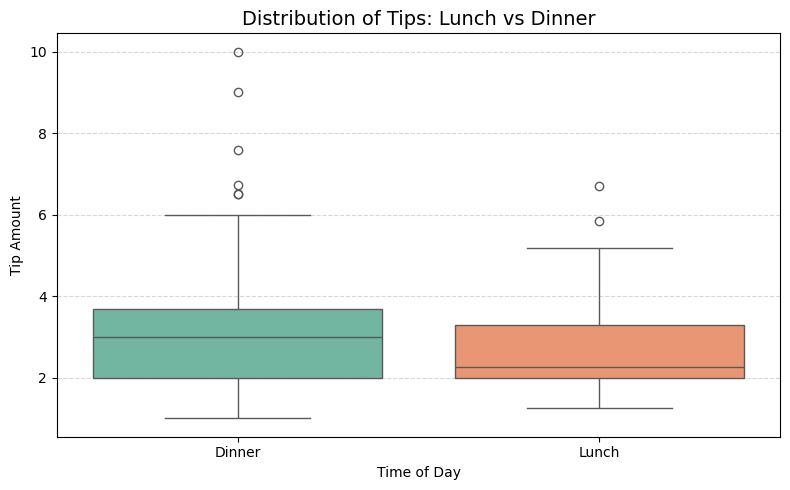

In [52]:
# ✅ 2. Boxplot comparing tips by time

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=data_time, x='time', y='tip', hue='time', palette='Set2', legend=False)
plt.title('Distribution of Tips: Lunch vs Dinner', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Tip Amount')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [53]:
# ✅ 3. Calculate Mean and Median over time
mean_tip_by_time = data_time.groupby('time')['tip'].mean()
median_tip_by_time = data_time.groupby('time')['tip'].median()

print("Mean tip:\n", mean_tip_by_time)
print("\nMedian tip:\n", median_tip_by_time)


Mean tip:
 time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

Median tip:
 time
Dinner    3.00
Lunch     2.25
Name: tip, dtype: float64


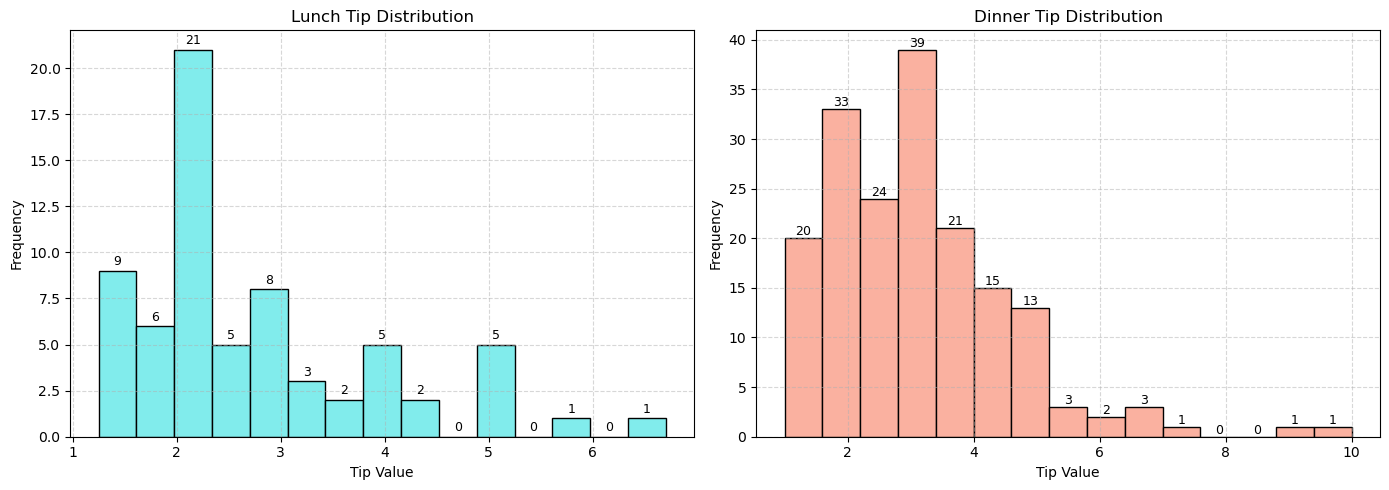

In [54]:
# ✅ 4. Draw a comparison histogram (Lunch vs Dinner)

plt.figure(figsize=(14, 5))

# Lunch
plt.subplot(1, 2, 1)
n, bins, _ = plt.hist(data_time[data_time['time'] == 'Lunch']['tip'], bins=15, color='#81ecec', edgecolor='black')
plt.title('Lunch Tip Distribution')
plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
for i in range(len(n)):
    plt.text((bins[i]+bins[i+1])/2, n[i]+0.3, int(n[i]), ha='center', fontsize=9)

# Dinner
plt.subplot(1, 2, 2)
n, bins, _ = plt.hist(data_time[data_time['time'] == 'Dinner']['tip'], bins=15, color='#fab1a0', edgecolor='black')
plt.title('Dinner Tip Distribution')
plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
for i in range(len(n)):
    plt.text((bins[i]+bins[i+1])/2, n[i]+0.3, int(n[i]), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## **Conclusion**

-   Smokers tend to leave higher tips than non-smokers.
-   Don't remove outliers: Men tend to leave higher tips than women, both in terms of median and maximum values. However, their tipping behavior also shows greater variability.
-   After removing outliers, the difference in tipping between males and females becomes smaller. Although males show greater variability and have some higher tips, the median values of both groups are nearly equal, indicating no significant difference in generosity between the two genders.
-   Tips tend to be higher on weekends than on weekdays.
-   Customers tend to tip more at dinner. Maybe dinner is a more formal occasion, or the order value is higher.